In [88]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [140]:
def rhs(t, Y):
    """ RHS of the system -- using 0-based indexing """
    x4  = Y[0]
    x12 = Y[1]
    x16 = Y[2]
    x20 = Y[3]

    dx4dt = -(1.0/32.0)*(rho**2)*(x4**3)*f_3a(T_9) - (1.0/12.0)*rho*x4*x12*f_a12(T_9) - (1.0/16.0)*rho*x4*x16*f_a16(T_9)
    dx12dt = +(1.0/32.0)*(rho**2)*(x4**3)*f_3a(T_9) - (1.0/4.0)*rho*x4*x12*f_a12(T_9)
    dx16dt =                                       + (1.0/3.0)*rho*x4*x12*f_a12(T_9) - (1.0/4.0)*rho*x4*x16*f_a16(T_9)
    dx20dt =                                                                       + (5.0/16.0)*rho*x4*x16*f_a16(T_9)

    return np.array([dx4dt, dx12dt, dx16dt, dx20dt])


def f_3a(T_9):
    return 2.79*(10**(-8))*exp(-4.4027/T_9)/(T_9**3)
def f_a12(T_9):
    return 1.04*(10**8)*exp(-32.120/(T_9**(1/3))-(T_9/3.496)**2)/((T_9**2)*(1.0+0.0489/(T_9**(2/3)))**2) + ((1.76*(10**8))/((T_9**2)*(1.0+0.2654/(T_9**(2/3)))**2))*exp(-32.120/(T_9**(1/3))) + ((1.25*(10**3))/(T_9**(3/2)))*exp(-27.499/T_9) + ((1.43*10**(-2))*(T_9**5))*exp(-15.541/T_9)
def f_a16(T_9):
    return 9.37*(10**9)*exp(-39.757/T_9**(1/3)-(T_9/1.586)**2)/(T_9**(2/3)) + ((6.21*10)/(T_9**(3/2)))*exp(-10.297/T_9) + ((5.38*10**2)/(T_9**(3/2)))*exp(-12.226/T_9) + 1.30*10*(T_9**2)*exp(-20.093/T_9)

rho = 10**4
T_9 = 0.15
#rho = 10**2 
"""change rho to see what will happen"""
#T_9 = 1 
#T_9 = 0.5
"""change Temperature to see what will happen"""
#rho = 10**5
#T_9 = 10

sol = solve_ivp(rhs, [0, 1.e30], [1.0, 0.0, 0.0, 0.0], method="BDF", dense_output=True)
#print(sol.t, sol.y[0], sol.y[1], sol.y[2], sol.y[3])
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 370
     njev: 6
      nlu: 58
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f557286a0b8>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 2.00000000e-04, 1.20000000e-03,
       2.20000000e-03, 1.22000000e-02, 2.22000000e-02, 1.22200000e-01,
       2.22200000e-01, 1.22220000e+00, 2.22220000e+00, 1.22222000e+01,
       2.22222000e+01, 1.22222200e+02, 2.22222200e+02, 1.22222220e+03,
       2.22222220e+03, 1.22222222e+04, 2.22222222e+04, 1.22222222e+05,
       2.22222222e+05, 1.22222222e+06, 2.22222222e+06, 1.22222222e+07,
       2.22222222e+07, 1.22222222e+08, 2.22222222e+08, 7.77951232e+08,
       1.33368024e+09, 1.88940925e+09, 7.44669935e+09, 1.30039895e+10,
       1.85612796e+10, 3.21055270e+10, 4.56497744e+10, 5.91940219e+10,
       7.27382693e+10, 9.36864749e+10, 1.14634680e+11, 1.35582886e+11,
       1.56531092e+11, 1.77479297e+11, 2.1949907

Text(0.5, 1.0, 'mass fractions vary with time at $T_9 = 0.15$ and $\\rho = 10^4 g \\  cm^{-3}$')

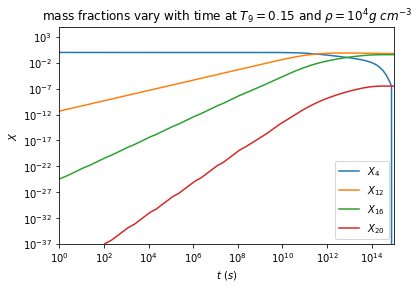

In [141]:
plt.ylim(1.e-37, 1.e5)
plt.xlim(1.e0, 1.e15)
plt.loglog(sol.t, sol.y[0], label = "$X_{4}$")
plt.loglog(sol.t, sol.y[1], label = "$X_{12}$")
plt.loglog(sol.t, sol.y[2], label = "$X_{16}$")
plt.loglog(sol.t, sol.y[3], label = "$X_{20}$")
plt.legend()

plt.xlabel(r'$t \ (s)$')
plt.ylabel('$X$')
plt.title(r'mass fractions vary with time at $T_9 = 0.15$ and $\rho = 10^4 g \  cm^{-3}$')
#plt.savefig('hw5-q3-d4_plot.jpg')


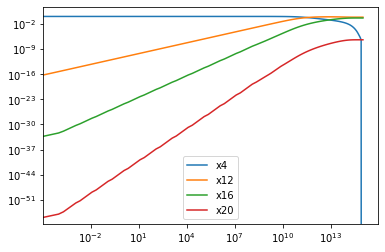

In [77]:
#fig = plt.figure()
#ax = fig.add_subplot(111)

#np.logspace(-6, 8, 15)
#ax.plot(sol.t, sol.y[0], label=rf"$y_{n+1}$")
#ax.plot(sol.t, sol.y[0], label = "x4")
#ax.plot(sol.t, sol.y[1], label = "x12")
#ax.plot(sol.t, sol.y[2], label = "x16")
#ax.plot(sol.t, sol.y[3], label = "x20")
#ax.set_xscale("log")
#ax.set_yscale("log")
#ax.legend()
